In [93]:
import sklearn as skl

In [94]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
# The iris object that is returned by load_iris is a Bunch object, which is very similar to a dictionary
# It contains keys and values. 

In [95]:
print(f'Keys of iris dataset: \n {iris_dataset.keys()}')

Keys of iris dataset: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [96]:
# DESCR is the description of the dataset. 
print(f'{iris_dataset['DESCR']}')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [97]:
# The value of the key target_names is an array of strings containing the species of flowers in the dataset. 
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [98]:
# The value of the key feature_names is a list of strings, giving the description of each feature. 
iris_dataset['feature_names'] 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [99]:
import numpy as np

In [100]:
# The actual data is contained in the 'data' feature and is a numpy ndarray
type(iris_dataset['data'])

numpy.ndarray

In [101]:
# It has a shape of (150,4) corresponding to 150 rows and 4 features.
iris_dataset['data'].shape

(150, 4)

In [102]:
# The target array contains the species of each of the flowers that were measured, also as a Numpy array:
type(iris_dataset['target'])

numpy.ndarray

In [103]:
# It is a one- dimensional array with one entry per flower. 
iris_dataset['target'].shape

(150,)

In [104]:
# The target values corresponds to the index of the target_names.
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [105]:
iris_dataset['target'] # So 0 correponds to setosa, 1 corresponds to versicolor, and 2 corresponds to virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0
)

C:\Python312\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:96: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


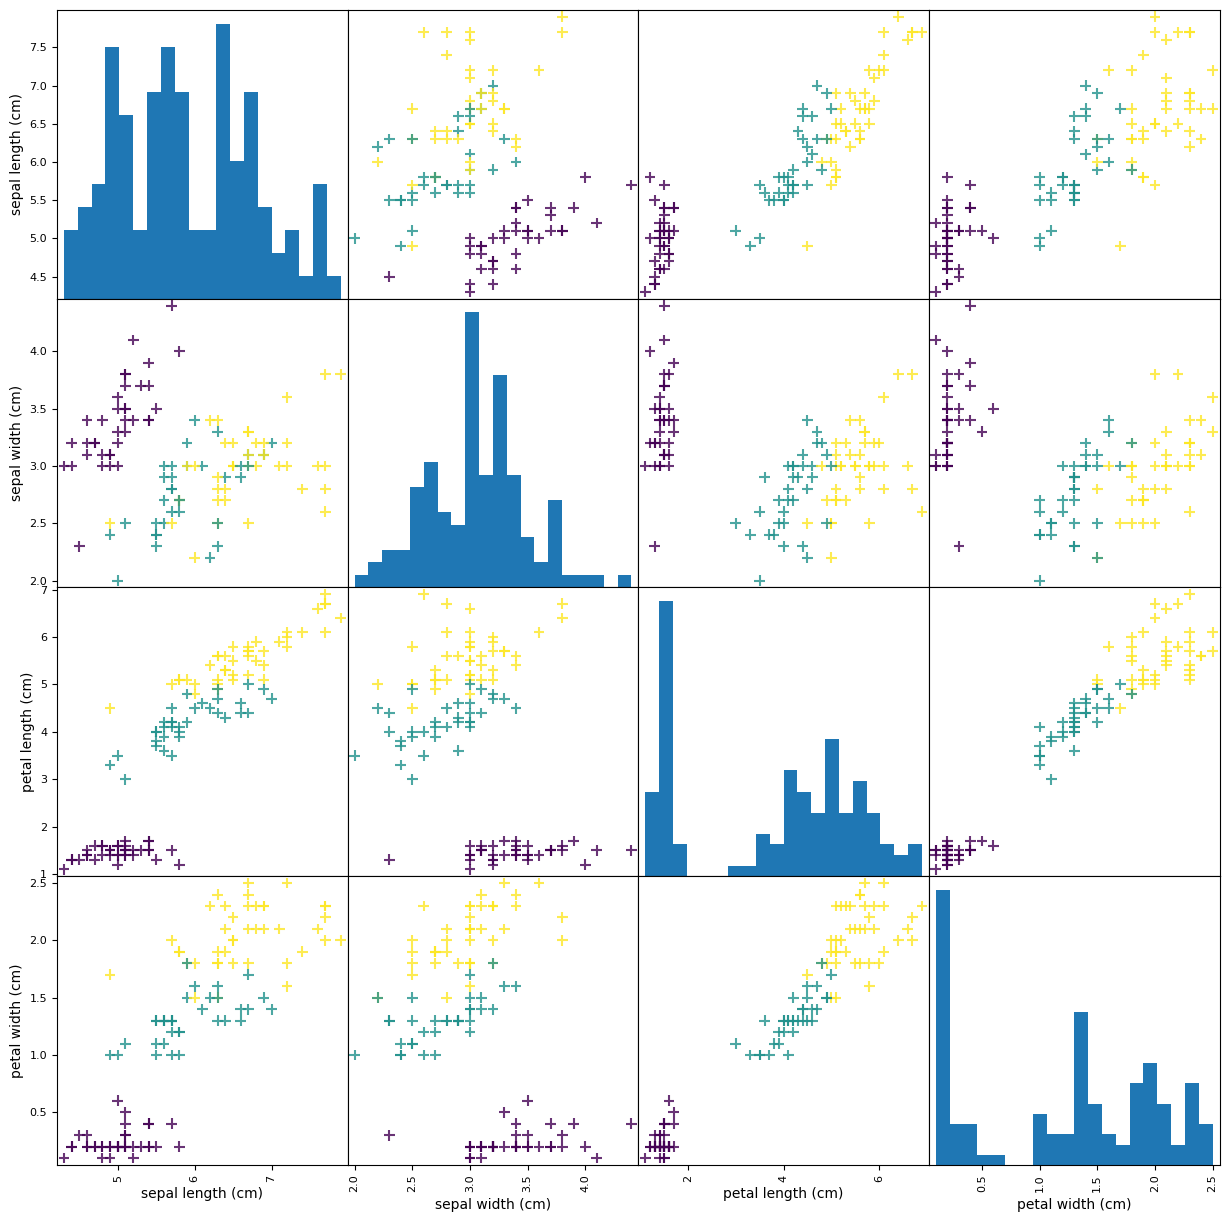

In [109]:
# Let's use pair plots on the data. 
import pandas as pd 
from pandas.plotting import scatter_matrix
# pandas can do this with a method called scatter_matrix.
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset['feature_names'])
# Create a scatter matrix from the dataframe, and color by y_train.
grr = scatter_matrix(iris_dataframe, c = y_train, figsize = (15,15), marker = '+', hist_kwds = {'bins' : 20}, s = 60, alpha = 0.8)

The scatter matrix plot (also known as a pair plot) visualizes pairwise relationships and distributions of features in a dataset. Here's how to interpret it:

1. **Diagonals (Histograms):** The diagonal plots show the distribution of each feature. For instance, the histogram in the first row and first column shows the distribution of `sepal length (cm)`. These give you an idea of the range and frequency of values for each feature.

2. **Off-Diagonals (Scatter Plots):** The plots off the diagonal are scatter plots showing the relationship between pairs of features. For example, the plot in the first row and second column shows `sepal length (cm)` vs. `sepal width (cm)`. These scatter plots help you see potential correlations between features.

3. **Color Coding:** The points are colored based on the target variable (`y_train`), which represents the class labels in the iris dataset. In your case, there are three classes:
   - Blue
   - Red
   - Green

   Each color represents a different species of iris.

4. **Patterns and Insights:**
   - **Cluster Separation:** You can observe how well the classes are separated based on different pairs of features. For instance, the `petal length (cm)` vs. `petal width (cm)` scatter plot (bottom right) shows clear clusters, indicating these features are good at separating the species.
   - **Correlations:** Look for linear or non-linear patterns in the scatter plots. A clear linear pattern suggests a strong correlation between two features. For example, the scatter plot of `petal length (cm)` vs. `petal width (cm)` shows a strong positive correlation.

5. **Outliers and Overlaps:** 
   - **Outliers:** Points that are far away from the main cluster of data might be outliers.
   - **Overlaps:** Areas where different colors overlap indicate that the features may not be sufficient to distinguish between classes.

In summary, this scatter matrix helps you understand the relationships and distributions of features, identify potential correlations, and assess how well different features can separate the classes in your dataset.

# KNNs

K-Nearest Neighbors (KNN) is a simple, non-parametric, and lazy learning algorithm used for classification and regression. Here’s an overview of how it works:

### Key Concepts

1. **Non-Parametric:** KNN doesn't make any assumptions about the underlying data distribution. It relies on the actual data points to make predictions.
2. **Lazy Learning:** KNN doesn't build an explicit model during training. Instead, it memorizes the training dataset and performs computations only when making predictions.

### How KNN Works

#### Classification
1. **Choose the number of neighbors \( k \):** This is a user-defined parameter. It defines how many nearest neighbors to consider when making a prediction.
2. **Calculate Distance:** For a given input, calculate the distance between this input and all points in the training set. Common distance metrics include Euclidean distance, Manhattan distance, and Minkowski distance.
3. **Identify Neighbors:** Identify the \( k \) closest points (neighbors) to the input based on the calculated distances.
4. **Voting:** The class of the input is determined by the majority class among the \( k \) nearest neighbors. For example, if 3 out of 5 neighbors belong to class A, the input is classified as class A.

#### Regression
1. **Choose the number of neighbors \( k \).**
2. **Calculate Distance:** Compute the distance between the input and all training points.
3. **Identify Neighbors:** Find the \( k \) closest neighbors.
4. **Average:** The prediction is made by averaging the target values (e.g., continuous values) of the \( k \) nearest neighbors.

### Advantages of KNN

- **Simplicity:** Easy to understand and implement.
- **No Training Phase:** Since it's a lazy learner, there is no training phase, which means you can add data to the training set dynamically.
- **Versatile:** Can be used for both classification and regression tasks.


### Disadvantages of KNN

- **Computationally Expensive:** Since it needs to compute the distance to all training points for each prediction, it can be slow for large datasets.
- **Memory Intensive:** Requires storing the entire training dataset, which can be problematic for large datasets.
- **Sensitivity to Noise:** KNN can be sensitive to noisy data and outliers.
- **Choice of \( k \) and Distance Metric:** The performance of KNN heavily depends on the choice of \( k \) and the distance metric. Choosing an inappropriate \( k \) can lead to poor performance.
- **Sparcity issues:** KNN does not perform well on  datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so called sparse datasets).


### Conclusion

KNN is a straightforward and effective algorithm for many applications, particularly when the dataset is small and the relationships between features are complex. However, for larger datasets or more complex tasks, other algorithms might be more suitable due to KNN's computational and memory limitations. 


In [110]:
# We'll use a KNN with a single neighbour. 
# The most important parameters of the model is the number of neighbours, which we will set to 1:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1)

In [111]:
# Let's fit the model. 
knn.fit(
    X = X_train, y = y_train
)

KNeighborsClassifier(n_neighbors=1)

In [112]:
# Let's evaluate the model on the test set. 
knn.score(X = X_test, y = y_test)

0.9736842105263158

-- The accuracy was 97.36842105263158% for k = 1 

In [122]:
val = knn.predict(X_test[23].reshape(1,-1))
print(f'Prediction : {iris_dataset['target_names'][val]} \n Actual : {iris_dataset['target_names'][y_test[23]]}')

Prediction : ['setosa'] 
 Actual : setosa
